In [7]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import cv2
import os

from sklearn.utils import shuffle
from PIL import Image

In [8]:
train_df = pd.read_csv("train_df.csv", index_col=False)

In [9]:
train_df = shuffle(train_df)

In [17]:
train_df = train_df.drop("Unnamed: 0", axis=1)

In [18]:
train_df

,FileName,InLane,LaneMaskFileName,LinesMaskFileName,BlobsMaskFileName
0,./dataset/no_lane/original/virus (3rd copy).png,False,./dataset/no_lane/lane_mask/virus (3rd copy).png,./dataset/no_lane/lines_mask/virus (3rd copy).png,./dataset/no_lane/blobs_mask/virus (3rd copy).png
1,./dataset/no_lane/original/virus (copy).png,False,./dataset/no_lane/lane_mask/virus (copy).png,./dataset/no_lane/lines_mask/virus (copy).png,./dataset/no_lane/blobs_mask/virus (copy).png
5,./dataset/lane/original/virus (another copy).png,True,./dataset/lane/lane_mask/virus (another copy).png,./dataset/lane/lines_mask/virus (another copy)...,./dataset/lane/blobs_mask/virus (another copy)...
2,./dataset/no_lane/original/virus (4th copy).png,False,./dataset/no_lane/lane_mask/virus (4th copy).png,./dataset/no_lane/lines_mask/virus (4th copy).png,./dataset/no_lane/blobs_mask/virus (4th copy).png
4,./dataset/lane/original/virus.png,True,./dataset/lane/lane_mask/virus.png,./dataset/lane/lines_mask/virus.png,./dataset/lane/blobs_mask/virus.png
3,./dataset/lane/original/virus (3rd copy).png,True,./dataset/lane/lane_mask/virus (3rd copy).png,./dataset/lane/lines_mask/virus (3rd copy).png,./dataset/lane/blobs_mask/virus (3rd copy).png


In [11]:
BATCH_SIZE = 1

In [124]:
def load_img(img_path, ismask=False):
    img = cv2.imread(img_path)
    if not ismask:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def generator(df, batch_size=BATCH_SIZE):
    num_samples = len(df)
    while True:
        samples = df
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            X = []
            y = []
            y_label = []
            for ind in range(len(batch_samples)):
                batch_sample = batch_samples.iloc[ind]
                img_path = batch_sample[0]
                y_imgs = [
                    load_img(batch_sample[2], ismask=True), 
                    load_img(batch_sample[3], ismask=True), 
                    load_img(batch_sample[4], ismask=True)]
                label = batch_sample[1]
                img =  load_img(img_path)
                
                X.append(img)
                y.append(y_imgs)
                y_label.append(label)

            X = np.array(X)
            y = np.array(y)

            yield X, y, y_label


In [125]:
train_datagen = generator(train_df, 2)

In [126]:
(X, Y, y_label) = next(train_datagen)

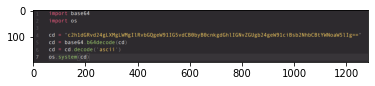

In [127]:
plt.imshow(X[0])